# Week 7

Author: Khushee Kapoor

Registration Number: 200968052

Last Updated: 26/09/22

## Setting Up

To set up, we import the following libraries:

- numpy: for data manipulation
- pandas: for data manipulation
- matplotlib: for data visualization
- seaborn: for data visualization
- tensorflow: for building neural networks
- string: for text preprocessing
- nltk: for text preprocessing

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import string
import nltk

Next, we import the IMDB Movie Review Sentiment Analysis dataset using the read_csv() function from the Pandas library.

In [ ]:
# reading the dataset
train = pd.read_csv('../input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv')
valid = pd.read_csv('../input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv')
test = pd.read_csv('../input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv')

Now, we peform some text preprocessing before we build our neural network. To begin, we first create a dictionary with all the contractions with their expansions. We also add a replacement for html tags that may be present in the text.

In [ ]:
# creating a dictionary with contrations and their expansions
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have",
"br" : ""}

After that, we create a custom made function to convert the contractions to expansions. This function loops over the previously created dictionary and uses the replace() function from the string library to replace the contractions with the expansions. Post that, we apply the function on every observation in the text column. To do that, we use the apply() function from the Pandas library and the lambda function.

In [ ]:
# custom made function to convert contraction to expansion
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

# applying the function on the text column of every dataset
train['text'] = train['text'].apply(lambda x:cont_to_exp(x))
valid['text'] = valid['text'].apply(lambda x:cont_to_exp(x))
test['text'] = test['text'].apply(lambda x:cont_to_exp(x))

Next, we create a custom made function to remove the punctuations. This function loops over the prebuilt punctuations list and uses the replace() function from the string library to replace the punctuations with blanks. Post that, we apply the function on every observation in the text column. To do that, we use the apply() function from the Pandas library and the lambda function.

In [ ]:
# custom function to replace punctuations with blanks
exclude = set(string.punctuation) 

def remove_punctuation(x): 
    try: 
        x = ''.join(ch for ch in x if ch not in exclude) 
    except: 
        pass 
    return x 

# applying the function on the text column of every dataset
train['text'] = train['text'].apply(remove_punctuation)
valid['text'] = valid['text'].apply(remove_punctuation)
test['text'] = test['text'].apply(remove_punctuation)

Next, we convert the string in the text to lower case. To do that, we use the lower() function from the string library.

In [ ]:
# converting all strings to lower case 
train['text'] = train['text'].str.lower()
valid['text'] = valid['text'].str.lower()
test['text'] = test['text'].str.lower()

After that, we remove the stopwords from the text using the stopword repository from the nltk library and applying it over the text column in the dataset using the apply() function from the Pandas library.

In [ ]:
# removing the stopwords from the text
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
valid['text'] = valid['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next, we tokenize the text using the word_tokenize() function from the nltk library and apply it over the column using the apply() function from the pandas library.

In [ ]:
# tokenizing the text
from nltk import word_tokenize
nltk.download('punkt')
train['tokens'] = train['text'].apply(lambda x : word_tokenize(x))
valid['tokens'] = valid['text'].apply(lambda x : word_tokenize(x))
test['tokens'] = test['text'].apply(lambda x : word_tokenize(x))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


After that, we lemmetize the tokens using the WordNetLemmetizer() function from the nltk library and apply it over the column using the apply() function from the pandas library.

In [ ]:
# lemmetizing the tokens
from nltk.stem import WordNetLemmatizer 
nltk.download('omw-1.4')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
train['lemma'] = train['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])
test['lemma'] = test['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])
valid['lemma'] = valid['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


For visualization, we map the binary labels to categorical labels using the map() function from the library.

In [ ]:
# mapping the binary labels to categorical labels
train['label'] = train['label'].map({0:'negative', 1:'positive'})
valid['label'] = valid['label'].map({0:'negative', 1:'positive'})
test['label'] = test['label'].map({0:'negative', 1:'positive'})

Next, we import CountVectorizer from the sklearn library to obtain unigrams and bigrams.

In [ ]:
# importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

To visualize the distribution of unigrams, we create a custom made function to get the top n unigrams/ words. This function uses CountVectorizer to generate unigrams from the review after removing the stop words, calculates the frequency of each unigram, then splices and returns the top n unigrams and their frequency sorted in the descending order based on frequency.

In [ ]:
# custom made function to return the top n unigrams
def get_top_n_words(x, n=25):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

After that, we call the previously created function and pass the text column from all the datasets and specify n to be 25, and store the returned value in a variable.

In [ ]:
# calling function and storing result in a variable
common_words = get_top_n_words(train['text'], 25)
common_words

[('movie', 68349),
 ('film', 60692),
 ('like', 31395),
 ('good', 23259),
 ('time', 19231),
 ('really', 18486),
 ('story', 17998),
 ('bad', 14377),
 ('great', 14314),
 ('people', 14190),
 ('movies', 12611),
 ('films', 12489),
 ('make', 12336),
 ('way', 12316),
 ('characters', 11961),
 ('think', 11414),
 ('watch', 10987),
 ('seen', 10679),
 ('character', 10484),
 ('love', 10284),
 ('acting', 10103),
 ('plot', 10078),
 ('little', 9990),
 ('know', 9923),
 ('best', 9923)]

As we can see, we have received a list of tuples containing the top 25 unigrams and their frequencies.

Next, we create a dataframe of the returned list using the DataFrame() function from the Pandas library and set the index to be the Unigrams to make our further analysis easier.

In [ ]:
# creating a dataframe from the returned list
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])

# setting index to be unigrams
df1.set_index('Unigram Text', drop=True, inplace=True)

After that, we use the plot.bar() function from the Pandas library to plot a barplot of the unigrams and their frequencies. We also use matplotlib aesthetic functions to enhance the readability of the chart.

Text(0.5, 1.0, 'Unigrams Count')

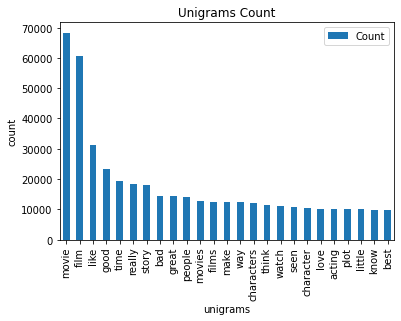

In [ ]:
# barplot to represent the frequency of unigrams
df1.plot.bar()
plt.xlabel('unigrams')
plt.ylabel('count')
plt.title('Unigrams Count')

As we can see, the unigram 'movie' is used most frequently, followed closely by 'film'.

To visualize the distribution of bigrams, we create a custom made function to get the top n bigrams. This function uses CountVectorizer to generate bigrams from the review after removing the stop words, calculates the frequency of each bigram, then splices and returns the top n bigrams and their frequency sorted in the descending order based on frequency.

In [ ]:
# custom made function to return the top n bigrams
def get_top_n_bigram(x, n=25):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

After that, we call the previously created function and pass the review column and specify n to be 25, and store the returned value in a variable.

In [ ]:
# calling function and storing result in a variable
common_words = get_top_n_bigram(train['text'], 25)
common_words

[('special effects', 1734),
 ('looks like', 1364),
 ('waste time', 1193),
 ('good movie', 1134),
 ('watch movie', 1075),
 ('look like', 1069),
 ('years ago', 1004),
 ('low budget', 1001),
 ('new york', 974),
 ('movie like', 936),
 ('movie really', 890),
 ('pretty good', 889),
 ('main character', 857),
 ('high school', 856),
 ('watching movie', 824),
 ('bad movie', 815),
 ('movie seen', 801),
 ('real life', 788),
 ('year old', 782),
 ('saw movie', 756),
 ('great movie', 753),
 ('horror movie', 750),
 ('really good', 732),
 ('long time', 708),
 ('horror film', 706)]

As we can see, we have received a list of tuples containing the top 25 bigrams and their frequencies.

Next, we create a dataframe of the returned list using the DataFrame() function from the Pandas library and set the index to be the Bigrams to make our further analysis easier.

In [ ]:
# creating a dataframe from the returned list
df2 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])

# setting index to be unigrams
df2.set_index('Bigram Text', drop=True, inplace=True)

After that, we use the plot.bar() function from the Pandas library to plot a barplot of the bigrams and their frequencies. We also use matplotlib aesthetic functions to enhance the readability of the chart.

Text(0.5, 1.0, 'Bigrams Count')

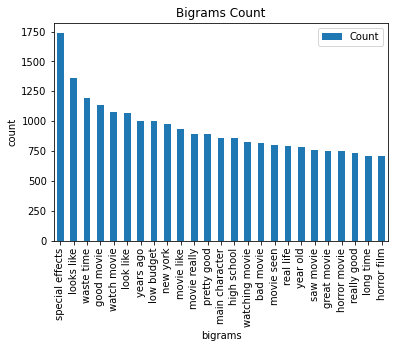

In [ ]:
# barplot to represent the frequency of biigrams
df2.plot.bar()
plt.xlabel('bigrams')
plt.ylabel('count')
plt.title('Bigrams Count')

As we can see, 'special effects' is the most frequent special effects.

To visualize the practical words that represent positive and negative sentiment in the dataset, we import the scatternet and spacy libraries.

In [ ]:
# importing the libraries
! pip install scattertext
import spacy
import scattertext as st
nlp = spacy.load('en_core_web_sm')

Next, we create a unigram corpus from the dataframe on the validation set (to optimize the building time) using functions from the scatternet library.

In [ ]:
# creating a corpus 
corpus = st.CorpusFromPandas(valid, category_col='label', text_col='text',  nlp=nlp).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

After that, we create an interactive html visualization to visualize the practical words that represent positive and negative sentiments.

In [ ]:
# creating an html visualization
html = st.produce_scattertext_explorer(corpus, category='negative', category_name='Negative', not_category_name='Positive', width_in_pixels=1000, transform=st.Scalers.dense_rank)
open('./PracticalWords.html', 'w').write(html)

5092131

The html file is attached in the assignment.

Next, to build the model, we remap the categorical labels to the binary labels using the map() function from the Pandas library.

In [ ]:
# mapping categorical labels to binary labels
train['label'] = train['label'].map({'negative':0, 'positive':1})
valid['label'] = valid['label'].map({'negative':0, 'positive':1})
test['label'] = test['label'].map({'negative':0, 'positive':1})

As a prequisite to build the model, we find the length of the longest lemmatized review in all the datasets.

In [ ]:
# finding the maximum lenght of the reviews
len_train = train['lemma'].apply(lambda x : len(x))
len_train = max(len_train)
len_valid = valid['lemma'].apply(lambda x : len(x))
len_valid = max(len_valid)
len_test = test['lemma'].apply(lambda x : len(x))
len_test = max(len_test)
max_len = max(len_train, len_valid, len_test)

Next, we divide the dataset into dependent (y) and independent (x) features.

In [ ]:
# dividing the datasets into dependent and independent features
x_train = train['lemma']
y_train = train['label']
x_valid = valid['lemma']
y_valid = valid['label']
x_test = test['lemma']
y_test = test['label']

After that, we create a padded sequence of the lemmas on all the independent features so that we can pass it to the neural networks. To do that, we use functions from the tensorflow library. We also obtain the total number of words, we use the word_index attribute.

In [ ]:
# creating a padded sequence of features on the training set
token = tf.keras.preprocessing.text.Tokenizer()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
# obtaining the total number of words
total_words = len(token.word_index) + 1

# creating a padded sequence of features on the testing set
token = tf.keras.preprocessing.text.Tokenizer()
token.fit_on_texts(x_valid)
x_valid = token.texts_to_sequences(x_valid)
x_valid = tf.keras.preprocessing.sequence.pad_sequences(x_valid, maxlen=max_len, padding='post', truncating='post')

# creating a padded sequence of features on the validation set
token = tf.keras.preprocessing.text.Tokenizer()
token.fit_on_texts(x_test)
x_test = token.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')

Now, we create a Long Short Term Memory of 15 layers using the Sequential API from the tensorflow library. To do that, we:
- create an Embedding Layer
- link the Embedding layer to 15 LSTM layers
- link the LSTM layers to a Dense neural network with 1 output neuron to predict the classes

In [ ]:
# building a Sequential model
lstm = tf.keras.models.Sequential()

# adding an Embedding layer
lstm.add(tf.keras.layers.Embedding(total_words, 32, input_length = max_len))

# adding 15 LSTM layers
for i in range(14):
  lstm.add(tf.keras.layers.LSTM(64, return_sequences=True))
lstm.add(tf.keras.layers.LSTM(64))

# linking the LSTM layers to a Dense neural network
lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))

After that, we compile the model using the 'adam' optimizer, loss as 'binary_crossentropy', and metrics as 'accuracy'. Then we train the model on the training data, using 1 epoch (as the compute power would allow) and validate it using the validation data. To avoid crash of server, we limit the batch size to 256.

In [ ]:
# compiling the model
lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training the model
lstm.fit(x_train, y_train, epochs=1, batch_size=256, validation_data=(x_valid, y_valid))

2022-09-24 14:25:57.438732: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-24 14:26:19.201274: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


157/157 [==============================] - 238s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4972


To evaluate the model's performance, we obtain it's accuracy on the testing set.

In [ ]:
# evaluating the model on the test set
print(str.format('Accuracy on Test Set: {:.2f}%', lstm.evaluate(x_test, y_test)[1]*100))

157/157 [==============================] - 53s 336ms/step - loss: 0.6932 - accuracy: 0.4990
Accuracy on Test Set: 49.90%


As we can see, the model has an accuracy of 49.90% on the test set, which is more or less average.

Now, we create a Bidirectional RNN of 20 layers using the Sequential API from the tensorflow library. To do that, we:
- create an Embedding Layer
- link the Embedding layer to 20 Bidirectional SimpleRNN layers
- link the LSTM layers to a Dense neural network with 1 output neuron to predict the classes

In [ ]:
# building a Sequential model
bidrnn = tf.keras.models.Sequential()

# adding an Embedding layer
bidrnn.add(tf.keras.layers.Embedding(total_words, 32, input_length = max_len))

# adding 20 Bidirectional RNN layers
for i in range(19):
  bidrnn.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32, return_sequences=True)))
bidrnn.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)))

# linking the Bidirectional RNN to a Deep neural network
bidrnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

After that, we compile the model using the 'adam' optimizer, loss as 'binary_crossentropy', and metrics as 'accuracy'. Then we train the model on the training data, using 1 epoch (as the compute power would allow) and validate it using the validation data. To avoid crash of server, we limit the batch size to 128.

In [ ]:
# compiling the network
bidrnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training the network
bidrnn.fit(x_train, y_train, epochs=1, batch_size=128, validation_data=(x_valid, y_valid))

313/313 [==============================] - 24803s 79s/step - loss: 0.6968 - accuracy: 0.5003 - val_loss: 0.6974 - val_accuracy: 0.4972


To evaluate the model's performance, we obtain it's accuracy on the testing set.

In [ ]:
# evaluating the model on the test set
print(str.format('Accuracy on Test Set: {:.2f}%', bidrnn.evaluate(x_test, y_test)[1]*100))

157/157 [==============================] - 727s 5s/step - loss: 0.6972 - accuracy: 0.4990
Accuracy on Test Set: 49.90%


As we can see, the model has an accuracy of 49.90% on the test set, which is more or less average.

Next, we create our own dataset with reviews and labels. We do this using the DataFrame() function from the Pandas library on a dictionary with the data.

In [ ]:
# creating a dictionary with the data
data = {
    'text': ['The movie was not so good', 'It was an average movie, but, the special effects blew my mind', 'Worst movie of my life. A complete time waste',
            'Best moview of my life. 3 hours well utilized', 'The movie was time pass only. One time watch.', 'Well written script',
            'What was the director thinking while shooting this movie is what I am wondering', 'Oh my god! Fell in love <3', 
            'How can someone watch this movie, it is like torture', 'Definitely recommending this movie to my friends'],
    'label' : [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

# converting dictionary to dataframe
testing = pd.DataFrame(data, columns=['text', 'label'])

After that, we apply all the preprocessing steps on the new testing set as we did previously.

In [ ]:
# preprocessing the text
testing['text'] = testing['text'].apply(lambda x:cont_to_exp(x))
testing['text'] = testing['text'].apply(remove_punctuation)
testing['text'] = testing['text'].str.lower()
testing['text'] = testing['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
testing['tokens'] = testing['text'].apply(lambda x : word_tokenize(x))
testing['lemma'] = testing['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

Now, we separate the dependent (y) and independent (x) features. 

In [ ]:
# segregating the dependent and independent features
x_testing = testing['lemma']
y_testing = testing['label']

Next, we create a padded sequence of the lemmas on all the independent features so that we can pass it to the neural networks. To do that, we use functions from the tensorflow library. We also obtain the total number of words, we use the word_index attribute.

In [ ]:
# creating a padded sequence of features on the testing set
token = tf.keras.preprocessing.text.Tokenizer()
token.fit_on_texts(x_testing)
x_testing = token.texts_to_sequences(x_testing)
x_testing = tf.keras.preprocessing.sequence.pad_sequences(x_testing, maxlen=max_len, padding='post', truncating='post')

Now, we evaluate the pretrained models on the newly created testing set. 

In [ ]:
# evaluating the newly created testing set
print(str.format('Accuracy on Test Set: {:.2f}%', lstm.evaluate(x_testing, y_testing)[1]*100))
print(str.format('Accuracy on Test Set: {:.2f}%', bidrnn.evaluate(x_testing, y_testing)[1]*100))

1/1 [==============================] - 0s 343ms/step - loss: 0.6932 - accuracy: 0.5000
Accuracy on Test Set: 50.00%
1/1 [==============================] - 4s 4s/step - loss: 0.6972 - accuracy: 0.5000
Accuracy on Test Set: 50.00%


As we can see, both the models have an accuracy of 50% on the newly created testing set, however, the lstm has a lesser loss than the bidirectional rnn.